In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
data = pd.read_csv('iris.csv');
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
maxX = max(data["SepalLengthCm"]);
minX = min(data["SepalLengthCm"]);
maxY = max(data["SepalWidthCm"]);
minY = min(data["SepalWidthCm"]);
maxZ = max(data["PetalLengthCm"]);
minZ = min(data["PetalLengthCm"]);
maxK = max(data["PetalWidthCm"]);
minK = min(data["PetalWidthCm"]);
column = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"];

In [3]:
lists = [];
datakelaske=[];
for i in range(0,3):
    lists.append([random.uniform(minX,maxX),random.uniform(minY,maxY),random.uniform(minZ,maxZ),random.uniform(minK,maxK)])
centroid = np.array(lists)
centroidbaru = np.zeros(centroid.shape);
    #cluster
while 1:
    kelas = []
    for j in range(data.shape[0]):
        distance = [];
        for k in range(centroid.shape[0]):
            sums = 0;
            for l in range(centroid.shape[1]):
                sums = sums + ((data[column[l]].iloc[j] - centroid[k][l])**2)
            distance.append(math.sqrt(sums))
        kelas.append(distance.index(min(distance)))
    kelas = np.array(kelas)
    
    for k in range(centroid.shape[0]):
        if(data.iloc[np.where(kelas==k)].count()[0]==0):
            continue
        for l in range(centroid.shape[1]):
            centroidbaru[k][l] =data[column[l]].iloc[np.where(kelas==k)].sum()/data[column[l]].iloc[np.where(kelas==k)].count()
    distancecentro = np.sqrt(np.sum(((centroid-centroidbaru)**2),1));
    if (np.array(np.where(distancecentro<=0.05)).shape[1]==centroid.shape[0]):
        break
    else:
        centroid = centroidbaru;

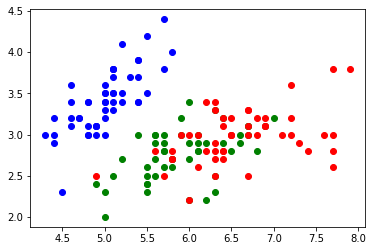

In [4]:
plt.plot(data[data['Species']=='Iris-setosa']['SepalLengthCm'],data[data['Species']=='Iris-setosa']['SepalWidthCm'],'bo',data[data['Species']=='Iris-versicolor']['SepalLengthCm'],data[data['Species']=='Iris-versicolor']['SepalWidthCm'],'go',data[data['Species']=='Iris-virginica']['SepalLengthCm'],data[data['Species']=='Iris-virginica']['SepalWidthCm'],'ro')

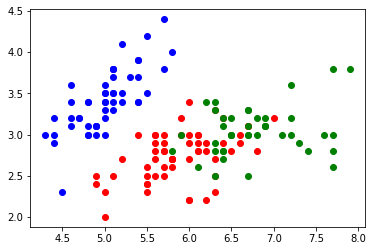

In [5]:
plt.plot(data.iloc[np.where(kelas==0)]['SepalLengthCm'],data.iloc[np.where(kelas==0)]['SepalWidthCm'],'bo',data.iloc[np.where(kelas==1)]['SepalLengthCm'],data.iloc[np.where(kelas==1)]['SepalWidthCm'],'ro',data.iloc[np.where(kelas==2)]['SepalLengthCm'],data.iloc[np.where(kelas==2)]['SepalWidthCm'],'go')